## Macro Averaged Precision
## Micro Averaged Precision
## Weighted Precision

In [10]:
import numpy as np
from sklearn import metrics
from collections import Counter

In [25]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yp == 1 and yt == 1:
            tp += 1
    return tp

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yp == 1 and yt == 0:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yp == 0 and yt == 1:
            fn += 1
    return fn

In [4]:
def macro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))

    precision = 0

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp  = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_precision = tp/(tp+fp)
        precision += temp_precision

    precision /= num_classes
    return precision

In [17]:
def micro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    
    tp = 0
    fp = 0

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp += true_positive(temp_true, temp_pred)
        fp += false_positive(temp_true, temp_pred)

    precision = tp/(tp+fp)
    return precision

In [23]:
def weighted_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))

    class_counts = Counter(y_true)

    precision = 0

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)

        temp_precision = tp/(tp+fp)

        weighted_precision = class_counts[class_] * temp_precision
        precision += weighted_precision

    overall_precision = precision / len(y_true)
    return overall_precision

In [13]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [15]:
print(macro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average="macro"))

0.3611111111111111
0.3611111111111111


In [18]:
print(micro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average="micro"))

0.4444444444444444
0.4444444444444444


In [24]:
print(weighted_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average="weighted"))

0.39814814814814814
0.39814814814814814


## Confusion Marix
### Type-I Error: FP
### Type-II Error: FN
A confusion matrix is nothing
but a table of TP, FP, TN and FN. Using the confusion matrix, you can quickly see
how many samples were misclassified and how many were classified correctly.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [27]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [28]:
cm = metrics.confusion_matrix(y_true, y_pred)

Text(0.5, 57.249999999999986, 'Predicted Labels')

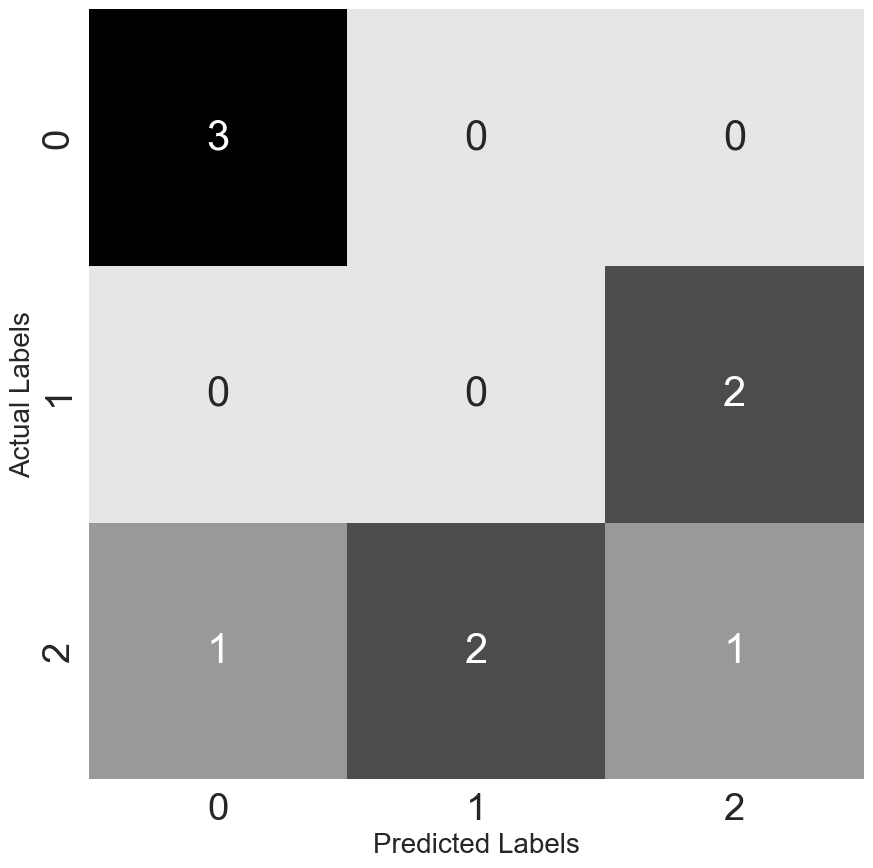

In [54]:
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)